In [1]:
# import sys

# print("--sys.version—")
# print(sys.version)
# print(sys.executable)
# print(sys.path)
# sys.path.append("/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages")

In [1]:
# 1/2.BC압력

# - 제어압력에 비례하는 공기 브레이크실린더 압력(Braking Compressor) 입니다.

# - 주로 압력센서에 의해 측정되며 제동력에 비례합니다.

# - 신분당선이 6량(6개 객차가 연결됨)이어서 #5, #6번은 없는게 맞습니다.



# 3. Target speed: 무시하셔도 됩니다.

#   Permitted speed: 제한속도로 생각하시면 됩니다.

#   Actual speed: 열차현재속도 (현재 로깅하고 있는 장치가 측정, 이를 기준으로 하시면 됩니다.)

#   Train speed: 다른 열차제어컴퓨터가 측정한 속도

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
filename = '20180713.csv'
df = pd.read_csv(f'..//Data//metroKOR//{filename}')
print(df.columns)

Index(['번호', '시간', 'FWD', 'REV', 'P/B', 'Motoring', 'Braking',
       'Train In Station', 'OP Mode', 'Target Speed', 'Permitted Speed',
       'Actual Speed', 'DISTANCE', 'Train Speed', 'VOBC ＃1', 'VOBC ＃0',
       'MR Pressure', 'Master Clock of VOBC', 'Line Voltage',
       'Train In Station.1', 'Next Platform ID', 'Final Platform ID',
       'Distance to Target', 'BC ＃1', 'BC ＃2', 'BC ＃3', 'BC ＃4', 'Unnamed: 27',
       'Unnamed: 28', 'BC ＃7', 'BC ＃0', 'Train Room Temp ＃1',
       'Train Outside Temp ＃1', '편성번호', '열차길이'],
      dtype='object')


In [4]:
# for a in range(43004):
#     if not df['Train In Station'][a] == df['Train In Station.1'][a]:
#         print('!')

In [5]:
# print(df['OP Mode'].unique())
# print(df['편성번호'].unique()) 
# print(df['열차길이'].unique())
# print(df['VOBC ＃1'].unique())
# print(df['VOBC ＃0'].unique())

In [6]:
df.rename({'BC ＃1': 'BC1', 'BC ＃2': 'BC2', 'BC ＃3': 'BC3', 
           'BC ＃4': 'BC4', 'BC ＃7': 'BC5', 'BC ＃0': 'BC6'}, axis=1, inplace=True)
df.drop(['번호', 'OP Mode', '편성번호', '열차길이', 'VOBC ＃1', 'VOBC ＃0',
         'Master Clock of VOBC', 'Train In Station.1',
         'Next Platform ID', 'Final Platform ID',
         'Unnamed: 27', 'Unnamed: 28', 'Target Speed',
         'Train Room Temp ＃1', 'Train Outside Temp ＃1',
         'FWD', 'REV', 'Train In Station', 'Line Voltage',
         'DISTANCE', 'MR Pressure', 'Distance to Target'
        ], axis=1, inplace=True)


In [7]:
df

,시간,P/B,Motoring,Braking,Permitted Speed,Actual Speed,Train Speed,BC1,BC2,BC3,BC4,BC5,BC6
0,12:02:40,71 (%),1,0,50 (km/h),40 (km/h),41 (km/h),0 (kPa),0 (kPa),0 (kPa),0 (kPa),0 (kPa),0 (kPa)
1,12:02:41,71 (%),1,0,90 (km/h),43 (km/h),43 (km/h),0 (kPa),0 (kPa),0 (kPa),0 (kPa),0 (kPa),0 (kPa)
2,12:02:42,65 (%),1,0,90 (km/h),46 (km/h),46 (km/h),0 (kPa),0 (kPa),0 (kPa),0 (kPa),0 (kPa),0 (kPa)
3,12:02:43,63 (%),1,0,90 (km/h),48 (km/h),48 (km/h),0 (kPa),0 (kPa),0 (kPa),0 (kPa),0 (kPa),0 (kPa)
4,12:02:44,63 (%),1,0,90 (km/h),48 (km/h),48 (km/h),0 (kPa),0 (kPa),0 (kPa),0 (kPa),0 (kPa),0 (kPa)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42999,23:59:55,0 (%),0,0,0 (km/h),0 (km/h),0 (km/h),330 (kPa),327 (kPa),324 (kPa),288 (kPa),336 (kPa),336 (kPa)
43000,23:59:56,0 (%),0,0,0 (km/h),0 (km/h),0 (km/h),330 (kPa),327 (kPa),324 (kPa),288 (kPa),336 (kPa),333 (kPa)
43001,23:59:57,0 (%),0,0,0 (km/h),0 (km/h),0 (km/h),330 (kPa),327 (kPa),324 (kPa),288 (kPa),336 (kPa),336 (kPa)
43002,23:59:58,0 (%),0,0,0 (km/h),0 (km/h),0 (km/h),330 (kPa),327 (kPa),324 (kPa),288 (kPa),333 (kPa),336 (kPa)


In [8]:
df.rename(columns={'시간': 'time'}, inplace=True)
df.columns = df.columns.str.lower()

In [9]:
df['time'] = pd.to_datetime(filename[:-4] + df['time'].str.replace(':', ''))
#df['time'] = df['time'].str.replace(':', '')
#df['time'] = df['time'].astype('int64')

In [11]:
df['p/b'] = df['p/b'].str[:-3]
df['p/b'] = df['p/b'].astype('int64')

In [12]:
speedwords = ['permitted', 'actual', 'train']
for word in speedwords:
    df[f'{word} speed'] = df[f'{word} speed'].str[:-6]
    df[f'{word} speed'] = df[f'{word} speed'].astype('int64')

In [13]:
for i in range(1, 7):
    df[f'bc{i}'] = df[f'bc{i}'].str[:-5]
    df[f'bc{i}'] = df[f'bc{i}'].astype('float64')

In [11]:
# threewords = ['p/b', 'distance', 'line voltage', 'distance to target']

# # 'p/b' (%)
# # 'distance' (m)
# # 'line voltage' (V)
# # 'distance to target' (m)

# for word in threewords:
#     df[f'{word}'] = df[f'{word}'].str[:-3]
#     df[f'{word}'] = df[f'{word}'].astype('int64')

# df['mr pressure'] = df['mr pressure'].str[:-5] #(mpa?) (kpa?)
# df['mr pressure'] = df['mr pressure'].str.replace('．', '.')
# df['mr pressure'] = df['mr pressure'].astype('float64')

# for i in range(1, 7):
#     df[f'bc{i}'] = df[f'bc{i}'].str[:-5]
#     df[f'bc{i}'] = df[f'bc{i}'].astype('float64')

# speedwords = ['permitted', 'actual', 'train']
# for word in speedwords:
#     df[f'{word} speed'] = df[f'{word} speed'].str[:-6]
#     df[f'{word} speed'] = df[f'{word} speed'].astype('int64')

In [14]:
# print(df.shape)
# print(df.dtypes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43004 entries, 0 to 43003
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   time             43004 non-null  datetime64[ns]
 1   p/b              43004 non-null  int64         
 2   motoring         43004 non-null  int64         
 3   braking          43004 non-null  int64         
 4   permitted speed  43004 non-null  int64         
 5   actual speed     43004 non-null  int64         
 6   train speed      43004 non-null  int64         
 7   bc1              43004 non-null  float64       
 8   bc2              43004 non-null  float64       
 9   bc3              43004 non-null  float64       
 10  bc4              43004 non-null  float64       
 11  bc5              43004 non-null  float64       
 12  bc6              43004 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(6)
memory usage: 4.3 MB


In [15]:
df.describe() # 통계값들


,p/b,motoring,braking,permitted speed,actual speed,train speed,bc1,bc2,bc3,bc4,bc5,bc6
count,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000
mean,-2.674286,0.365571,0.433448,46.706748,39.484374,38.985722,73.215166,66.095433,63.080295,68.806483,65.729048,72.230560
std,39.284994,0.481595,0.495557,33.687426,34.349977,33.929602,101.571522,101.030534,100.444586,90.750764,103.455092,102.598315
min,-100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-43.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,50.000000,44.000000,43.000000,39.000000,21.000000,0.000000,39.000000,18.000000,36.000000
75%,19.000000,1.000000,1.000000,86.000000,68.000000,67.000000,132.000000,126.000000,120.000000,132.000000,123.000000,132.000000
max,100.000000,1.000000,1.000000,90.000000,92.000000,91.000000,345.000000,333.000000,330.000000,300.000000,345.000000,345.000000


In [14]:
# #df.count()
# df = df[['time', 'p/b', 'motoring', 'braking', 'train speed', 'permitted speed', 'train in station', 'distance to target'
#          #'permitted speed', 'train speed', #'target speed', 'actual speed', 
#          #'distance to target', 'train in station'
#         ]]


In [16]:
df.iloc[110:120]

,time,p/b,motoring,braking,permitted speed,actual speed,train speed,bc1,bc2,bc3,bc4,bc5,bc6
110,2018-07-13 12:04:30,-43,0,1,50,0,0,132.0,132.0,126.0,138.0,126.0,147.0
111,2018-07-13 12:04:31,-43,0,1,50,0,0,132.0,132.0,126.0,138.0,126.0,147.0
112,2018-07-13 12:04:32,-43,0,1,50,0,0,132.0,132.0,126.0,138.0,126.0,150.0
113,2018-07-13 12:04:33,-43,0,1,50,0,0,132.0,132.0,126.0,138.0,126.0,147.0
114,2018-07-13 12:04:34,-43,0,1,50,0,0,132.0,132.0,126.0,138.0,126.0,147.0
115,2018-07-13 12:04:35,-35,1,0,50,0,0,132.0,132.0,120.0,138.0,117.0,126.0
116,2018-07-13 12:04:36,3,1,0,50,0,0,39.0,51.0,51.0,45.0,45.0,42.0
117,2018-07-13 12:04:37,3,1,0,50,0,0,0.0,18.0,0.0,0.0,0.0,0.0
118,2018-07-13 12:04:38,43,1,0,50,1,0,0.0,0.0,0.0,0.0,0.0,0.0
119,2018-07-13 12:04:39,81,1,0,50,3,2,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df[(df['motoring'] == 1) & (df['p/b'] < 0)]

,time,p/b,motoring,braking,permitted speed,actual speed,train speed,bc1,bc2,bc3,bc4,bc5,bc6
115,2018-07-13 12:04:35,-35,1,0,50,0,0,132.0,132.0,120.0,138.0,117.0,126.0
559,2018-07-13 12:11:59,-3,1,0,90,87,85,30.0,0.0,0.0,36.0,18.0,36.0
802,2018-07-13 12:16:02,-3,1,0,90,86,85,24.0,0.0,0.0,27.0,0.0,33.0
904,2018-07-13 12:17:44,-41,1,0,50,0,0,123.0,126.0,111.0,108.0,108.0,117.0
1210,2018-07-13 12:22:50,-43,1,0,50,0,0,123.0,123.0,120.0,138.0,117.0,138.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38179,2018-07-13 22:39:32,-3,1,0,62,56,55,33.0,0.0,21.0,57.0,24.0,39.0
38317,2018-07-13 22:41:50,-3,1,0,20,18,17,33.0,21.0,18.0,39.0,18.0,36.0
38669,2018-07-13 22:47:42,-3,1,0,10,7,7,51.0,24.0,21.0,42.0,24.0,42.0
38739,2018-07-13 22:48:52,-35,1,0,5,0,0,144.0,123.0,114.0,132.0,114.0,123.0


In [18]:
df.head()

,time,p/b,motoring,braking,permitted speed,actual speed,train speed,bc1,bc2,bc3,bc4,bc5,bc6
0,2018-07-13 12:02:40,71,1,0,50,40,41,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-07-13 12:02:41,71,1,0,90,43,43,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-07-13 12:02:42,65,1,0,90,46,46,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-07-13 12:02:43,63,1,0,90,48,48,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-07-13 12:02:44,63,1,0,90,48,48,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df.tail()

,time,p/b,motoring,braking,train speed,permitted speed,train in station,distance to target
42999,2018-07-13 23:59:55,0,0,0,0,0,0,0
43000,2018-07-13 23:59:56,0,0,0,0,0,0,0
43001,2018-07-13 23:59:57,0,0,0,0,0,0,0
43002,2018-07-13 23:59:58,0,0,0,0,0,0,0
43003,2018-07-13 23:59:59,0,0,0,0,0,0,0


In [16]:
#df.dtypes

In [17]:
#df.plot(x='time', y='train speed', figsize = (200, 10))#, kind = 'scatter')

In [18]:
#df.plot(x='time', y='p/b', figsize = (200, 10))

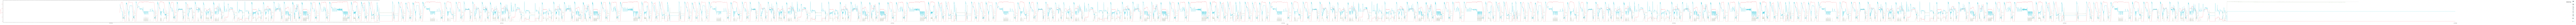

In [21]:
plt.rcParams['figure.figsize'] = [500, 5]
# plt.plot(df.time, df['train speed'], label='train speed', color='#FC9399')
# plt.plot(df.time, df['braking'], label='fwd', color='#68D6E4')
# plt.legend(fontsize=15, loc='best')
# plt.show()

fig, ax1 = plt.subplots()
color = '#FC9399'
ax1.set_xlabel('time')
ax1.set_ylabel('actual speed', color=color)
ax1.plot(df.time, df['actual speed'], label='actual speed', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = '#68D6E4'
ax2.set_ylabel('comparing element', color=color)  # we already handled the x-label with ax1
ax2.plot(df.time, df['p/b'], label='p/b', color=color) 
# comparing elements: p/b, motoring, braking, distance to target, train in station, permitted speed

ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_ylim(0.0, 2.0)

ax3 = ax1.twinx()
ax3.plot(df.time, df['bc1'], label='braking', color='#B9CEAC')

ax4 = ax1.twinx()
ax4.plot(df.time, df['bc4'], label='motoring', color='#E0E0E0')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.legend(fontsize=15, loc='best')

plt.show()

In [20]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # figure 준비
# fig = plt.figure()

# # subplot 생성
# ax = fig.add_subplot(1,1,1)        # (a,b,c) : a행 b열의 c번째에 subplot 생성

# # plot 그리기
# data = pd.DataFrame([7.925256, 6.686888, 7.891692, 6.885024, 7.211542, 7.301803], 
#                     columns=['col'])
# data2 = pd.DataFrame([6.899874, 7.256908, ], 
#                      columns=['col'])
# ax.plot(data['col'], color='g')
# ax.plot(data2['col'], color='#FF7F00')

# # plot 제목 설정
# ax.set_title('')

# # 축 이름 설정
# ax.set_xlabel('hidden unit size')   # x축 이름
# ax.set_ylabel('MAE')   # y축 이름

# # 범위 설정
# ax.set_xticks([0, 1, 2, 3, 4, 5])   # x축 눈금 지정(정수)
# ax.set_xticklabels(['10','14','18','22', '26', '30'], rotation=30, fontsize=10)    # x축 눈금 지정(문자열)
# ax.set_ylim([0.9997, 0.9998])            # y축 범위

# plt.savefig('MAE.png')